In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats as st
from scipy import stats

In [5]:
# read in data
data = pd.read_excel('学生统计.xls',header = 0)

In [20]:
# group by sex
F_Y = []
M_Y = []
for i in range(len(data)):
    if data.iloc[i]['性别'] == '女':
        F_Y.append(data.iloc[i]['估计王老师年龄'])
    else:
        M_Y.append(data.iloc[i]['估计王老师年龄'])

In [29]:
#统计男女生的人数
sum_M_Y , sum_F_Y = len(M_Y) , len(F_Y)
#计算男生对于王老师年龄的估计的期望
E_M_Y = np.mean(M_Y)
#计算女生对于王老师年龄的估计的期望
E_F_Y = np.mean(F_Y)

In [40]:
E_M_Y

49.20909090909091

In [41]:
E_F_Y

48.69672131147541

[Text(0.5, 1.0, ' female data distribution')]

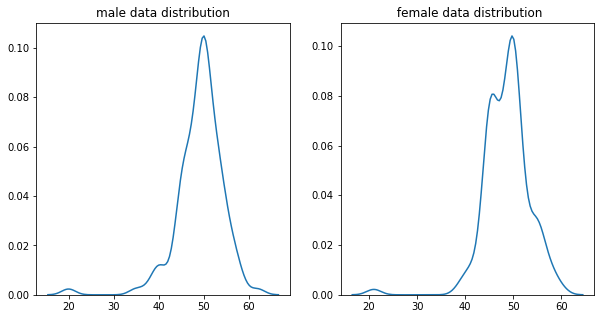

In [30]:
# plot data distribution 
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)
sns.kdeplot(data=M_Y, legend=False, ax=axes[0])
sns.kdeplot(data=F_Y, legend=False, ax=axes[1])
axes[0].set(title='male data distribution')
axes[1].set(title=' female data distribution')

In [31]:
#ks test check the data neither normal distribution
"""
kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
结果返回两个值：statistic → D值，pvalue → P值
p值大于0.05，为正态分布
H0:样本符合  
H1:样本不符合 
如何p>0.05接受H0 ,反之 
"""
## male data distribution
u_M = E_M_Y
std_M = np.std(M_Y)
p1_value = stats.kstest(M_Y,'norm',(u_M,std_M))
## female data distribution
u_F = E_F_Y
std_F = np.std(F_Y)
p2_value = stats.kstest(F_Y,'norm',(u_F,std_F))

In [32]:
p1_value

KstestResult(statistic=0.16064994063610005, pvalue=0.006012342050093492)

In [33]:
p2_value

KstestResult(statistic=0.1529696482372458, pvalue=0.005866215410974998)

In [34]:
#通过KS检验可以证明男生和女生对王老师年龄的估计符合正态分布 考虑建立两独立样本的t检验
#进行方差齐性检验
W, levene_P = stats.levene(M_Y, F_Y, center='mean')
print("Levene's方差齐性检验的W统计量为" + str(W))
print("Levene's方差齐性检验的P值为" + str(levene_P))

Levene's方差齐性检验的W统计量为0.1491509475893635
Levene's方差齐性检验的P值为0.6997050824924578


In [35]:
#方差齐性检验说明两样本之间的方差没有显著差异，使用标准t检验
t, p_two, df = st.ttest_ind(M_Y, F_Y)
print('t=' + str(t))
print('P值=' + str(p_two))
print('自由度=' + str(df))

t=0.7866602446266856
P值=0.4322905695828344
自由度=230.0
